In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from common_import import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
data_type_list = ['source_list', 'cam_param',
                  'cam_3d', 'img_2d',
                  'cam_3d_canonical_revolute', 'img_2d_canonical_revolute',
]
overwrite_list = []
dataset_name = '3dhp'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading 3DHP source_list...
[overwrite: False] ==> Loading 3DHP cam_param...
[overwrite: False] ==> Loading 3DHP cam_3d...
[overwrite: False] ==> Loading 3DHP img_2d...
[overwrite: False] ==> Loading 3DHP cam_3d_canonical_revolute...
[overwrite: False] ==> Loading 3DHP img_2d_canonical_revolute...


In [23]:
source_list = data['source_list'].copy()
subject, cam_id, action = split_source_name(source_list[0], dataset_name)
print(subject, cam_id, action)

# camera parameters
cam_param = data['cam_param'][subject][action][cam_id].copy()
W, H, intrinsic = cam_param['W'], cam_param['H'], cam_param['intrinsic']
fx, fy, cx, cy = intrinsic[0, 0], intrinsic[1, 1], intrinsic[0, 2], intrinsic[1, 2]
# original 3D/2D pose
cam_3d = data['cam_3d'][subject][action][cam_id].copy()
img_2d = data['img_2d'][subject][action][cam_id].copy()
cam_3d_canonical_revolute = data['cam_3d_canonical_revolute'][subject][action][cam_id].copy()
img_2d_canonical_revolute = data['img_2d_canonical_revolute'][subject][action][cam_id].copy()
img_2d_canonical_revolute_centered = img_2d_canonical_revolute.copy() - np.array([cx, cy]) + np.array([W//2, H//2])

K_inv = np.linalg.inv(intrinsic)
norm_img_2d_canonical_revolute = img_2d_canonical_revolute.copy() # np.stack([img_2d, np.ones([img_2d.shape[0], img_2d.shape[1], 1])])
norm_img_2d_canonical_revolute = np.concatenate([norm_img_2d_canonical_revolute, np.ones((norm_img_2d_canonical_revolute.shape[0], norm_img_2d_canonical_revolute.shape[1], 1))], axis=-1)
norm_img_2d_canonical_revolute = norm_img_2d_canonical_revolute @ K_inv.T

S1 cam0 Seq1


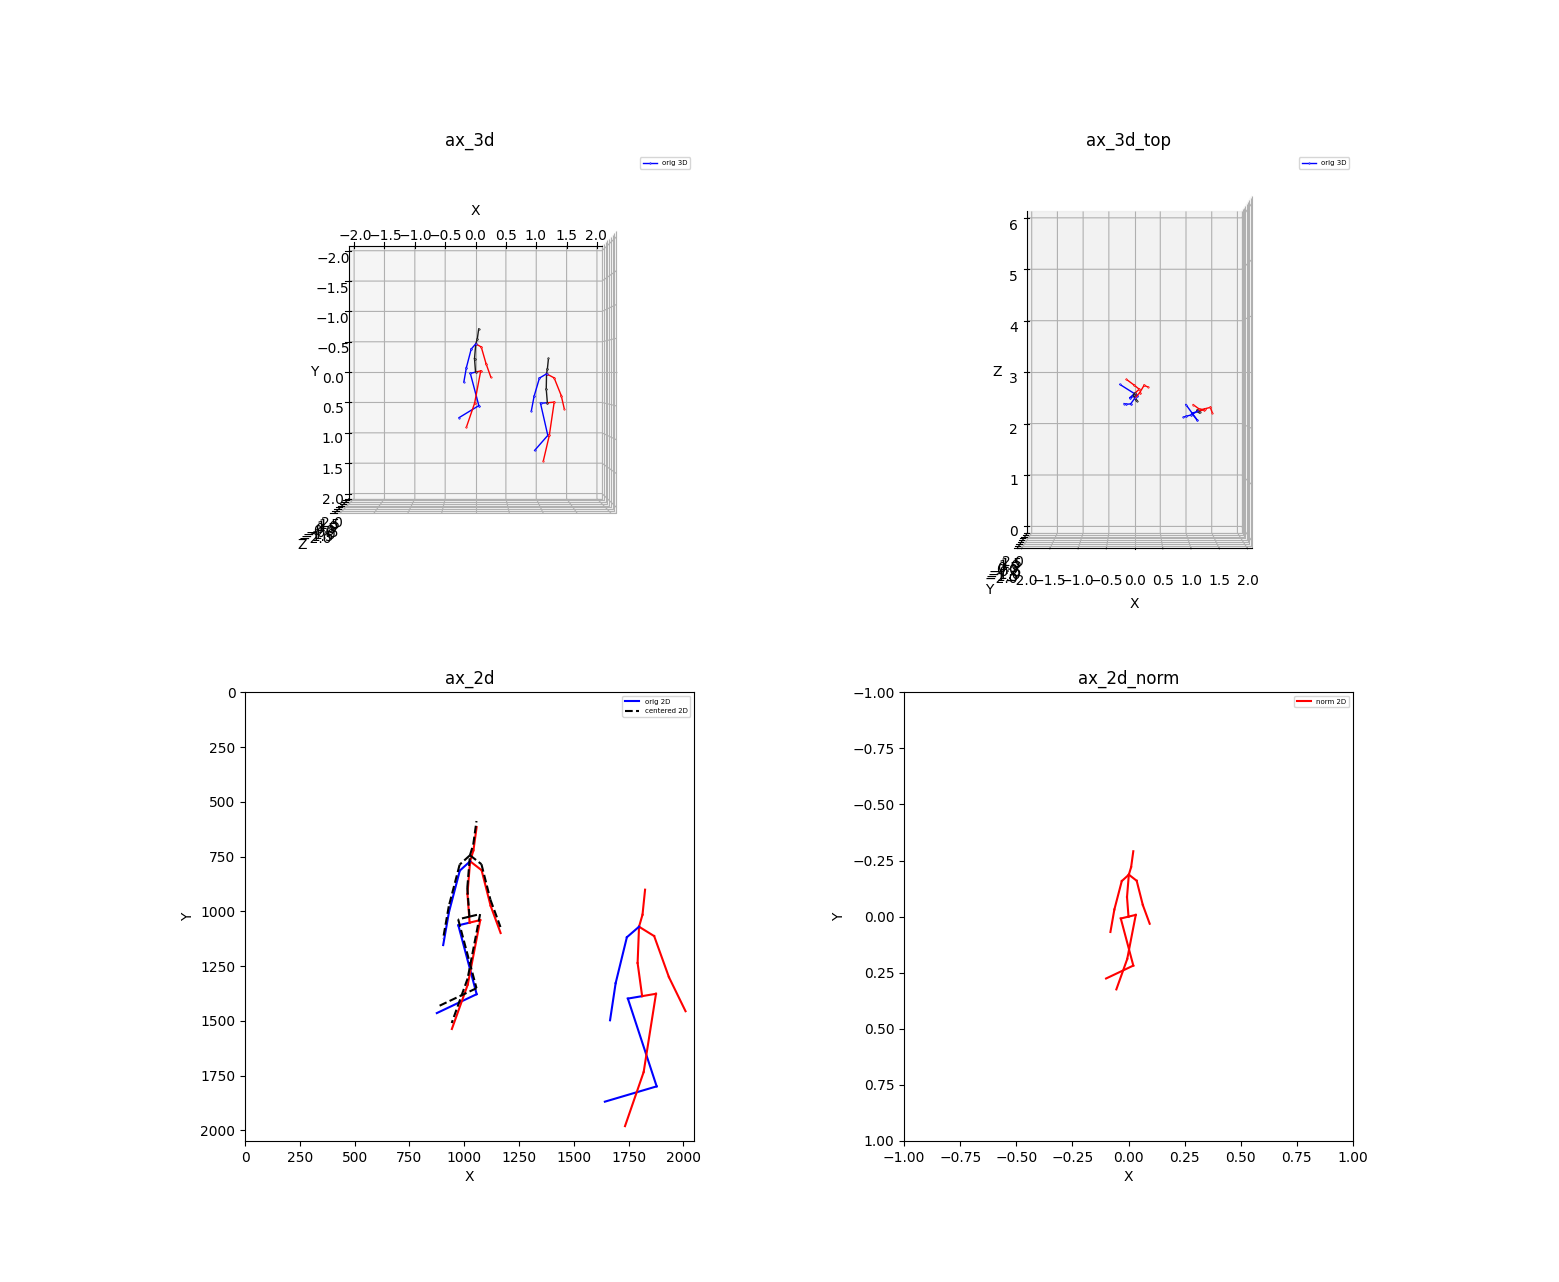

In [24]:
%matplotlib widget
# check original train data
frame_num = -1
configs = {
    'ax_3d': {'type': '3d', 'loc': 221, 'mode': 'cam'},
    'ax_3d_top': {'type': '3d', 'loc': 222, 'mode': 'cam_top', 'zlim': [0, 6]},
    'ax_2d': {'type': '2d', 'loc': 223, 'W': W, 'H': H},
    'ax_2d_norm': {'type': '2d', 'loc': 224, 'normalize': True},
}

fig, axs = generate_axes(1, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d', cam_3d,          {'color': '', 'label': 'orig 3D'}),
    ('ax_3d', cam_3d_canonical_revolute,          {'color': '', 'label': 'orig 3D'}),
    ('ax_3d_top', cam_3d,          {'color': '', 'label': 'orig 3D'}),
    ('ax_3d_top', cam_3d_canonical_revolute,          {'color': '', 'label': 'orig 3D'}),
    ('ax_2d', img_2d,          {'color': '', 'label': 'orig 2D'}),
    ('ax_2d', img_2d_canonical_revolute,          {'color': '', 'label': 'orig 2D'}),
    ('ax_2d', img_2d_canonical_revolute_centered, {'color': 'k', 'label': 'centered 2D', 'linestyle': '--'}),
    ('ax_2d_norm', norm_img_2d_canonical_revolute, {'color': 'r', 'label': 'norm 2D'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
plt.show()